In [1]:
import pyfredapi as pf
from dotenv import load_dotenv
load_dotenv()
import os
import matplotlib.pyplot as plt
import pandas as pd
import json

api_key = os.environ.get("api_key")

unem_data = pf.get_series(series_id="BAMLH0A0HYM2", api_key=api_key)

print(unem_data)

unem_info = pf.get_series_info(series_id="BAMLH0A0HYM2", api_key=api_key)

     realtime_start realtime_end       date  value
0        2023-05-13   2023-05-13 1996-12-31   3.13
1        2023-05-13   2023-05-13 1997-01-01    NaN
2        2023-05-13   2023-05-13 1997-01-02   3.06
3        2023-05-13   2023-05-13 1997-01-03   3.09
4        2023-05-13   2023-05-13 1997-01-06   3.10
...             ...          ...        ...    ...
6962     2023-05-13   2023-05-13 2023-05-05   4.77
6963     2023-05-13   2023-05-13 2023-05-08   4.72
6964     2023-05-13   2023-05-13 2023-05-09   4.74
6965     2023-05-13   2023-05-13 2023-05-10   4.78
6966     2023-05-13   2023-05-13 2023-05-11   4.81

[6967 rows x 4 columns]


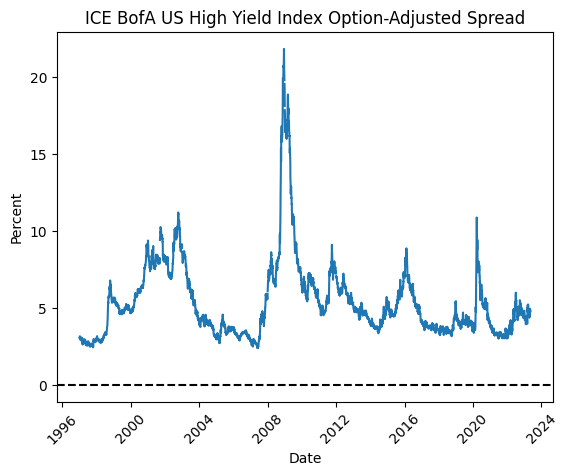

In [2]:
# Convert the "date" column to datetime format
unem_data['date'] = pd.to_datetime(unem_data['date'])

# Plot the graph
plt.plot(unem_data['date'], unem_data['value'])
plt.xlabel('Date')
plt.ylabel(unem_info.units)
plt.title(unem_info.title)
plt.xticks(rotation=45)

# Add a dashed line at y=0
plt.axhline(0, color='black', linestyle='--')

plt.show()

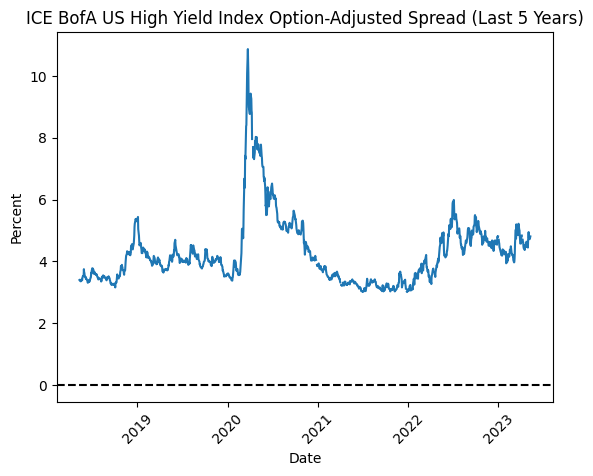

In [3]:
# Convert the "date" column to datetime format
unem_data['date'] = pd.to_datetime(unem_data['date'])

# Filter the DataFrame for the last 5 years
last_5_years_data = unem_data[unem_data['date'] >= unem_data['date'].max() - pd.DateOffset(years=5)]

# Plot the graph with data from the last 5 years
plt.plot(last_5_years_data['date'], last_5_years_data['value'])
plt.xlabel('Date')
plt.ylabel(unem_info.units)
plt.title(unem_info.title + ' (Last 5 Years)')
plt.xticks(rotation=45)

# Add a dashed line at y=0
plt.axhline(0, color='black', linestyle='--')

plt.show()

In [4]:
# Convert DataFrame to JSON
unem_json = unem_data.to_json(orient='records')

# Parse the JSON
data = json.loads(unem_json)

# Get the last item
last_item = data[-1]

print(str(unem_info.title) + ": " + str(last_item['value']) + "% | Last Updated: " + str(unem_info.last_updated))

ICE BofA US High Yield Index Option-Adjusted Spread: 4.81% | Last Updated: 2023-05-12 13:36:55-05


In [5]:
print("Info: " + str(unem_info.id))
print("Title: " + str(unem_info.title))
print("Frequency: " + str(unem_info.frequency))
print("Units: " + str(unem_info.units))
print("Last Updated: " + str(unem_info.last_updated))
print("Popularity: " + str(unem_info.popularity))
print("Notes: " + str(unem_info.notes))

Info: BAMLH0A0HYM2
Title: ICE BofA US High Yield Index Option-Adjusted Spread
Frequency: Daily, Close
Units: Percent
Last Updated: 2023-05-12 13:36:55-05
Popularity: 95
Notes: The ICE BofA Option-Adjusted Spreads (OASs) are the calculated spreads between a computed OAS index of all bonds in a given rating category and a spot Treasury curve. An OAS index is constructed using each constituent bond's OAS, weighted by market capitalization. The ICE BofA High Yield Master II OAS uses an index of bonds that are below investment grade (those rated BB or below).
This data represents the ICE BofA US High Yield Index value, which tracks the performance of US dollar denominated below investment grade rated corporate debt publicly issued in the US domestic market. To qualify for inclusion in the index, securities must have a below investment grade rating (based on an average of Moody's, S&P, and Fitch) and an investment grade rated country of risk (based on an average of Moody's, S&P, and Fitch fo